<a href="https://colab.research.google.com/github/Oraegbuayomide10/COVID-19-Time-Series-prediction/blob/master/Prediction_of_COVID_19_cases_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Download the WHO covid19 global data from your google drive***

In [2]:
# Download the WHO covid19 global data from your google drive
!gdown --id 1DlyZpU1nZ4bhER3PTgH8nR8KQT_XxG0J

Downloading...
From: https://drive.google.com/uc?id=1DlyZpU1nZ4bhER3PTgH8nR8KQT_XxG0J
To: /content/WHO-COVID-19-global-data.zip
100% 111k/111k [00:00<00:00, 35.4MB/s]


***Unzip the data***

In [0]:
# Unzip the data
!unzip WHO-COVID-19-global-data.zip> /dev/null

***List your data***

In [4]:
# List your data
!ls

sample_data  WHO-COVID-19-global-data.csv  WHO-COVID-19-global-data.zip


***Import libararies***

In [5]:
# Import libararies for the time series prediction
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
print(tf.__version__)

2.2.0


***Read the data***

In [6]:
# read the data
path = "/content"
global_cases = pd.read_csv(path +"/WHO-COVID-19-global-data.csv", encoding= "ISO-8859-1")
global_cases.head()

,ï»¿day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
0,2020-02-24,AF,Afghanistan,EMRO,0,0,1,1
1,2020-02-25,AF,Afghanistan,EMRO,0,0,0,1
2,2020-02-26,AF,Afghanistan,EMRO,0,0,0,1
3,2020-02-27,AF,Afghanistan,EMRO,0,0,0,1
4,2020-02-28,AF,Afghanistan,EMRO,0,0,0,1


***Print the information of the data***

In [7]:
# get the info of the data
global_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14814 entries, 0 to 14813
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ï»¿day                14814 non-null  object
 1   Country               14654 non-null  object
 2   Country Name          14814 non-null  object
 3   Region                14715 non-null  object
 4   Deaths                14814 non-null  int64 
 5   Cumulative Deaths     14814 non-null  int64 
 6   Confirmed             14814 non-null  int64 
 7   Cumulative Confirmed  14814 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 926.0+ KB


***Filter the data***

In [8]:
# Filter the data
for country in global_cases['Country Name']:
  if country == 'The United Kingdom':
    UK_cases = global_cases.drop(global_cases[global_cases["Country Name"]!= country].index)

UK_cases.reset_index()


,index,ï»¿day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
0,13433,2020-01-31,GB,The United Kingdom,EURO,0,0,2,2
1,13434,2020-02-01,GB,The United Kingdom,EURO,0,0,0,2
2,13435,2020-02-02,GB,The United Kingdom,EURO,0,0,0,2
3,13436,2020-02-03,GB,The United Kingdom,EURO,0,0,0,2
4,13437,2020-02-04,GB,The United Kingdom,EURO,0,0,0,2
...,...,...,...,...,...,...,...,...,...
99,13532,2020-05-09,GB,The United Kingdom,EURO,626,31241,4649,211368
100,13533,2020-05-10,GB,The United Kingdom,EURO,346,31587,3896,215264
101,13534,2020-05-11,GB,The United Kingdom,EURO,268,31855,3923,219187
102,13535,2020-05-12,GB,The United Kingdom,EURO,210,32065,3877,223064


***Print the information of the newly created dataframe***

In [9]:
# Check for info
UK_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 13433 to 13536
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ï»¿day                104 non-null    object
 1   Country               104 non-null    object
 2   Country Name          104 non-null    object
 3   Region                104 non-null    object
 4   Deaths                104 non-null    int64 
 5   Cumulative Deaths     104 non-null    int64 
 6   Confirmed             104 non-null    int64 
 7   Cumulative Confirmed  104 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 7.3+ KB


***Drop other existing columns except Cumulative Confirmed***

In [10]:
# drop other existing columns except Cumulative Confirmed
for column in UK_cases.columns:
  if column != "Cumulative Confirmed":
    del UK_cases[column]
UK_cases.reset_index()

,index,Cumulative Confirmed
0,13433,2
1,13434,2
2,13435,2
3,13436,2
4,13437,2
...,...,...
99,13532,211368
100,13533,215264
101,13534,219187
102,13535,223064


***Add an index to the data***

In [11]:
# add an index from 0 to 1

index = []
for i in range(104):
  index.append(i)

UK_cases['index'] = index
UK_cases.reset_index()

,level_0,Cumulative Confirmed,index
0,13433,2,0
1,13434,2,1
2,13435,2,2
3,13436,2,3
4,13437,2,4
...,...,...,...
99,13532,211368,99
100,13533,215264,100
101,13534,219187,101
102,13535,223064,102


***Format the data to a list***

In [0]:
# format the data to a list
time = [] # time which is index
series = [] # series which is cumulative confirmed

for values in UK_cases['index']:
  time.append(int(values))

for values in UK_cases['Cumulative Confirmed']:
  series.append(int(values))


***Convert the data to a Numpy array***

In [0]:
# convert the list to numpy array
time = np.array(time)
series = np.array(series)

***Plot the data***

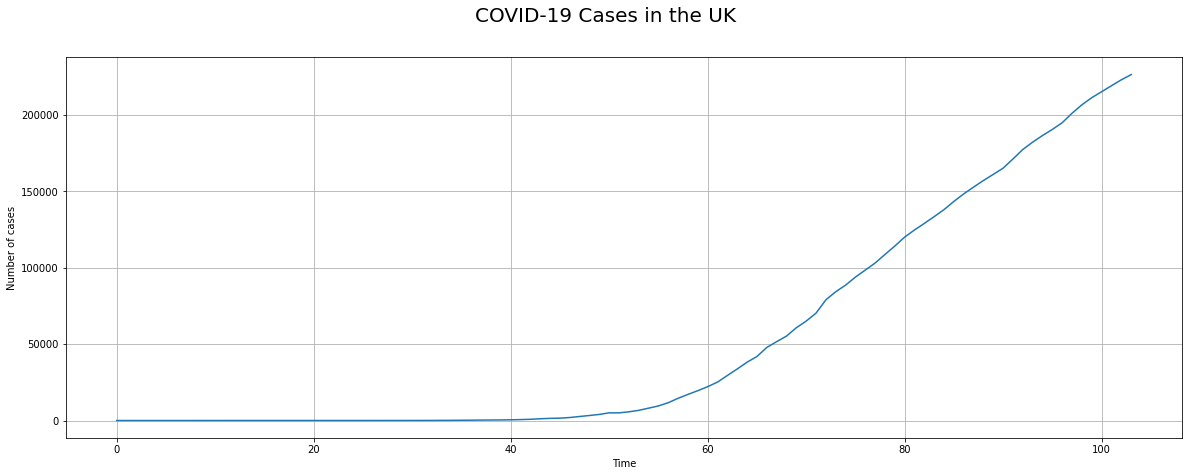

In [14]:
# Plot the data
plt.figure(figsize= (20, 7))
plt.xlabel("Time")
plt.ylabel("Number of cases")
plt.grid(True)
plt.suptitle('COVID-19 Cases in the UK', fontsize=20)
plt.plot(time, series)

***Split the data to training and validation dataset***

In [0]:
# Split dataset into train and validation

split_window = 100
x_train = series[:split_window]  # Training dataset for the number of cases
time_train = time[:split_window] # Training dataset for the time

x_valid = series[split_window:] # Validation dataset for the number of cases
time_valid = time[split_window:] # Validation dataset for the time


***Define the variables needed for creating a windowed data***

In [0]:
# variables
window_size = 1
batch_size = 32
shuffle_buffer_size = 40


***Define a function to create a windowed dataset***

In [0]:
# Function for creating windowed dataset
def windowed_dataset(series, window_size, batch_size, shuffle_buffer_size):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift = 1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size +1))
  dataset = dataset.shuffle(shuffle_buffer_size).map(lambda window: (window[:-1], window[-1:]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

***Create and Run the Model***

In [18]:
# Create our model

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(10, input_shape= [window_size], activation = "relu"),
                                    tf.keras.layers.Dense(10, activation ="relu"),
                                    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(lr = 1e-7, momentum=0.9)

model.compile(loss = "mae", optimizer = optimizer)

history = model.fit(dataset, epochs =300, verbose=True)

Epoch 1/300
4/4 [==============================] - 0s 14ms/step - loss: 42007.4766
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 39674.5000
Epoch 3/300
4/4 [==============================] - 0s 4ms/step - loss: 35194.7266
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 28773.1289
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 19661.0918
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 5339.6187
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 9573.4404
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 6222.9282
Epoch 9/300
4/4 [==============================] - 0s 3ms/step - loss: 5531.8579
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 7838.8086
Epoch 11/300
4/4 [==============================] - 0s 4ms/step - loss: 1769.9531
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 3424.7761
Epoch 13/300
4/4 [=

***View the training loss***

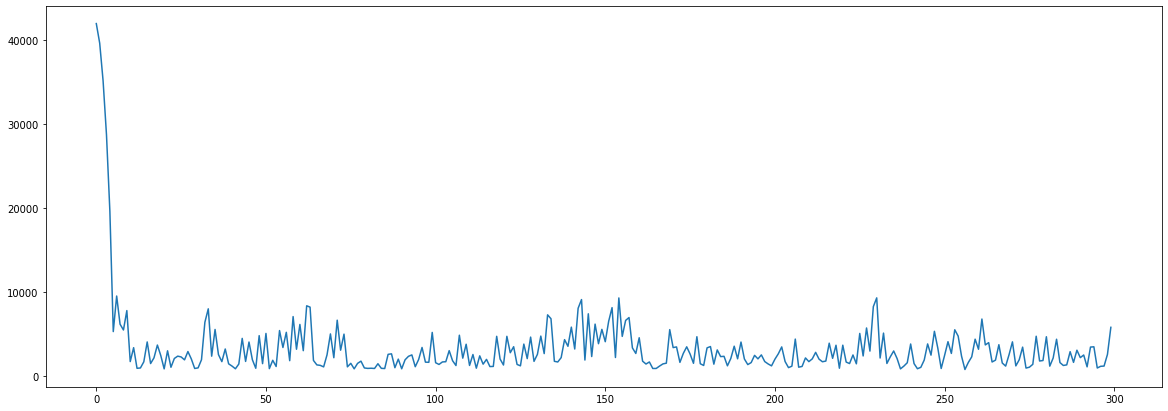

In [19]:
loss = history.history["loss"] # y axis
epochs = range(len(loss))  # x axis

plt.figure(figsize = (20, 7))
plt.plot(epochs, loss)

***Define a function for plotting of the time series data***

In [0]:
def plot_series(time, series, format='-', start= 0, end = None):
  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("Cases")
 
  plt.grid(True)

***Predict using the Model***


In [0]:
# for loop with a list created for forecasting
forecast = []
for time in range(len(series)- window_size):
  forecast.append(model.predict(series[time: time+window_size][np.newaxis]))

forecast = forecast[split_window-window_size:]
result = np.array(forecast)[:,0,0]

Plot the Prediction(forecast) and the validation

NOTE: The predicted daily cases has the orange color, while the validation(real daily cases) has the blue color.

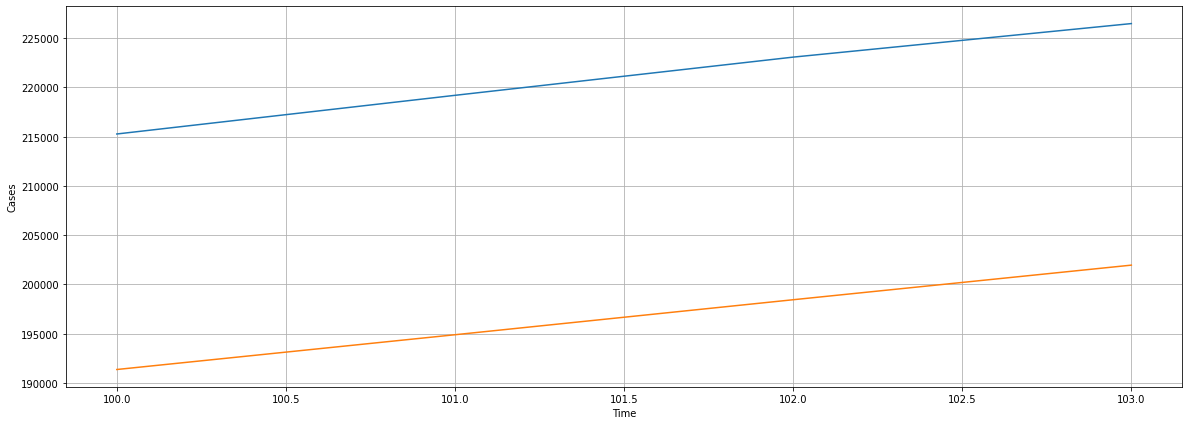

In [30]:
plt.figure(figsize=(20, 7))
plot_series(time_valid, x_valid)
plot_series(time_valid,result)



***View your prediction Error***

In [0]:
tf.keras.metrics.mean_absolute_error(x_valid, result).numpy()

23050.645

***Update the Model by increasing the number of neurons in the first two Dense layers***

In [0]:
tf.keras.backend.clear_session()

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(20, input_shape= [window_size], activation = "relu"),
                                    tf.keras.layers.Dense(20, activation ="relu"),
                                    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(lr = 1e-7, momentum=0.9)

model.compile(loss = "mae", optimizer = optimizer)

history = model.fit(dataset, epochs =300, verbose=0)

***Predict using the Model***

In [0]:
# for loop with a list created for forecasting
forecast = []
for time in range(len(series)- window_size):
  forecast.append(model.predict(series[time: time+window_size][np.newaxis]))

forecast = forecast[split_window-window_size:]
result = np.array(forecast)[:,0,0]

***Plot the prediction and the validation data***

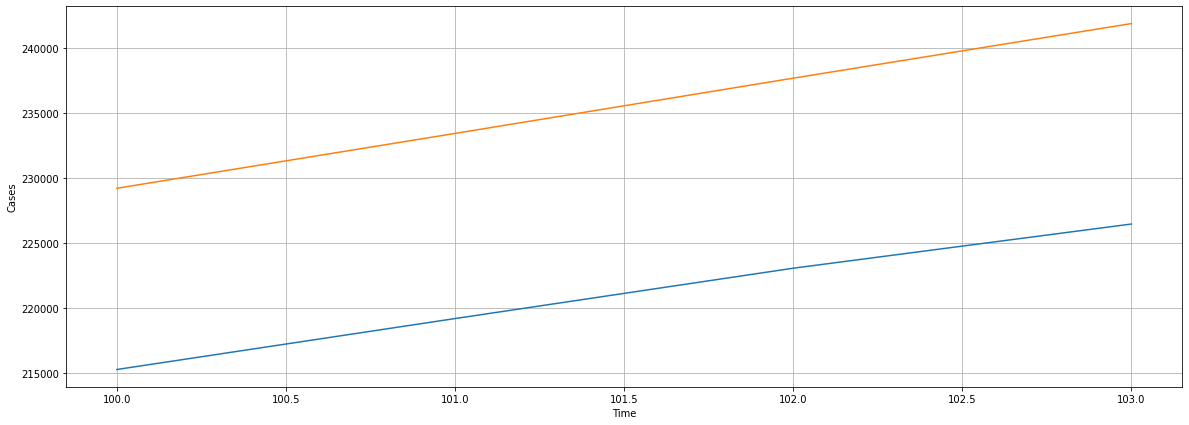

In [0]:
plt.figure(figsize=(20, 7))
plot_series(time_valid, x_valid)
plot_series(time_valid,result)

***View your prediction Error***

In [0]:
tf.keras.metrics.mean_absolute_error(x_valid, result).numpy()

14571.199

***Print a real value and print its prediction. How close are we to the real value?***

In [0]:
print("The real value is",series[101:102])
print("The model's predicted value is",model.predict(series[101:102]))

The real value is [219187]
The model's predicted value is [[237699.03]]


***Applying an RNN Model for Prediction***


In [31]:
tf.keras.backend.clear_session()

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
                                     tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                                                            input_shape= [None]),
                                     tf.keras.layers.SimpleRNN(20, return_sequences=True),
                                     tf.keras.layers.SimpleRNN(20),
                                     tf.keras.layers.Dense(1),
                                     tf.keras.layers.Lambda(lambda x: x*100.0)])

optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)

model.compile(loss = tf.keras.losses.Huber(),
              optimizer= optimizer,
              metrics = ["mae"])

history = model.fit(dataset, epochs=300, verbose =0)
print("Done Training")

Done Training


***Visualize our training loss***

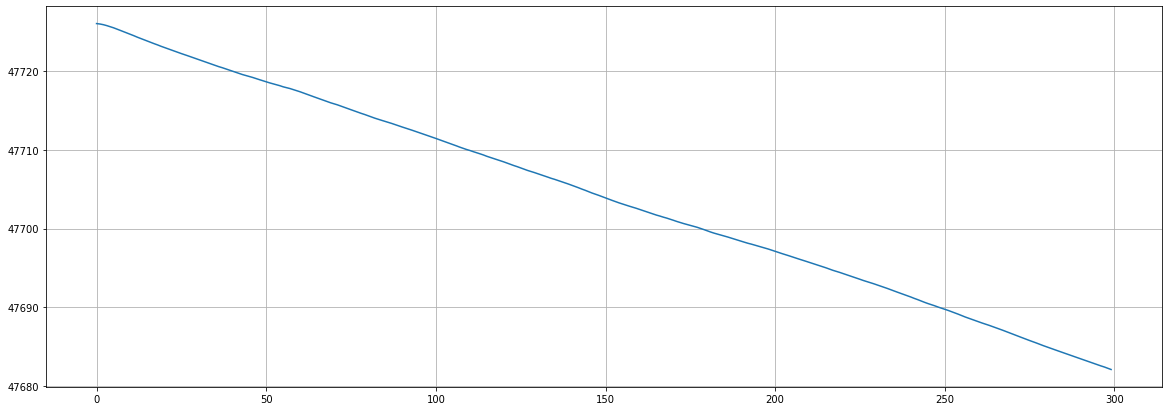

In [32]:
# Visualize our training loss
loss = history.history["loss"]
epochs = range(len(loss))
plt.figure(figsize=(20, 7))
plt.grid(True)
plt.plot(epochs, loss)

*Predict and plot the prediction*

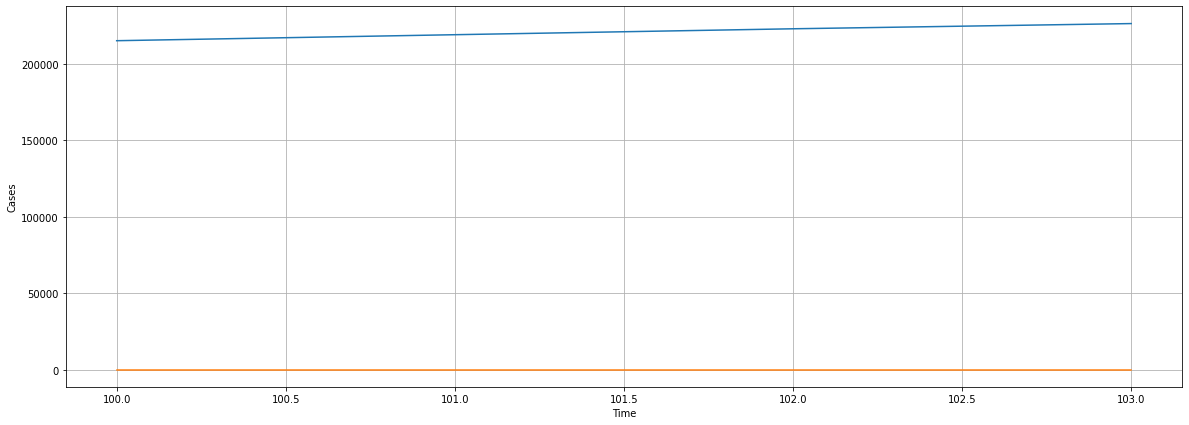

In [33]:
# Predict and plot the prediction 
forecast = []
for time in range(len(series)- window_size):
  forecast.append(model.predict(series[time: time+window_size][np.newaxis]))

forecast = forecast[split_window-window_size:]
result = np.array(forecast)[:,0,0]

plt.figure(figsize=(20, 7))
plot_series(time_valid, x_valid)
plot_series(time_valid,result)

***View your prediction Error***

In [0]:

tf.keras.metrics.mean_absolute_error(x_valid, result).numpy()

220880.95

***SInce it does seem the model isn't getting any better we add a learning Rate Scheduler to the model to help optimization of the learning rate with each epoch***

In [0]:

tf.keras.backend.clear_session()

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), 
                                                           input_shape=[None]),
                                    tf.keras.layers.SimpleRNN(20, return_sequences=True),
                                    tf.keras.layers.SimpleRNN(20),
                                    tf.keras.layers.Dense(1),
                                    tf.keras.layers.Lambda(lambda x: x*100.0)
])

callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-7 *(10**(epoch/20)))

optimizer = tf.keras.optimizers.SGD(lr = 1e-7, momentum=0.9)

model.compile(loss = "mae", optimizer = optimizer)

history = model.fit(dataset, epochs =300, verbose=0, callbacks = [callback])

print("Done Training")



Done Training


***Visualize the learning rate and pick the learning rate with the lowest learning rate***

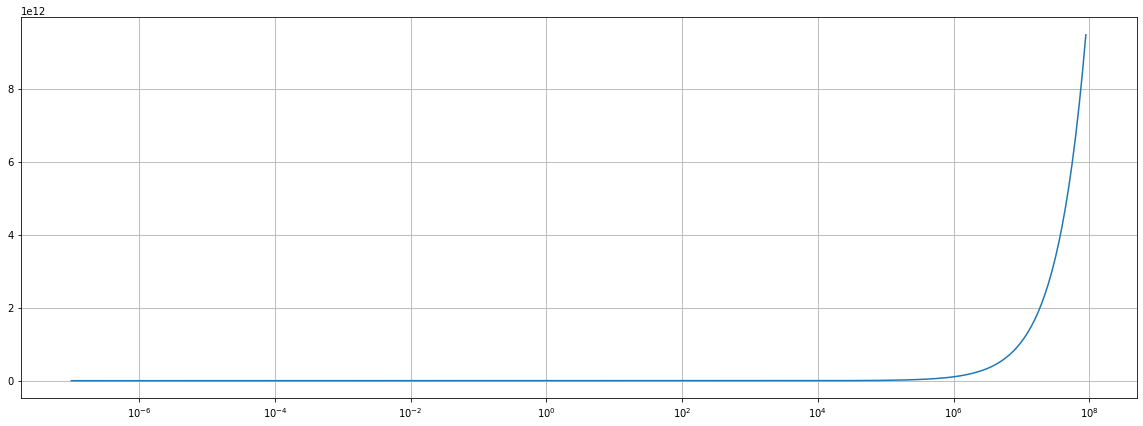

In [0]:
# Visualize our learning rate 
loss = history.history["loss"]
scheduler = 1e-7 *(10**(np.arange(300)/20))
plt.figure(figsize=(20, 7))
plt.grid(True)
plt.semilogx(scheduler, loss)

***Values between 1e-6 and 1e-7 seems okay, so we pick 1e-7 and run the model using that learning rate***

Note: We might get to change the number of epochs as the model tries to fit.

In [34]:
tf.keras.backend.clear_session()

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), 
                                                           input_shape=[None]),
                                    tf.keras.layers.SimpleRNN(20, return_sequences=True),
                                    tf.keras.layers.SimpleRNN(20),
                                    tf.keras.layers.Dense(1),
                                    tf.keras.layers.Lambda(lambda x: x*100.0)
])



optimizer = tf.keras.optimizers.SGD(lr = 1e-6, momentum=0.9)

model.compile(loss = "mae", optimizer = optimizer)

history = model.fit(dataset, epochs =300, verbose=0)

print("Done Training")

Done Training


*Predict and plot the prediction*

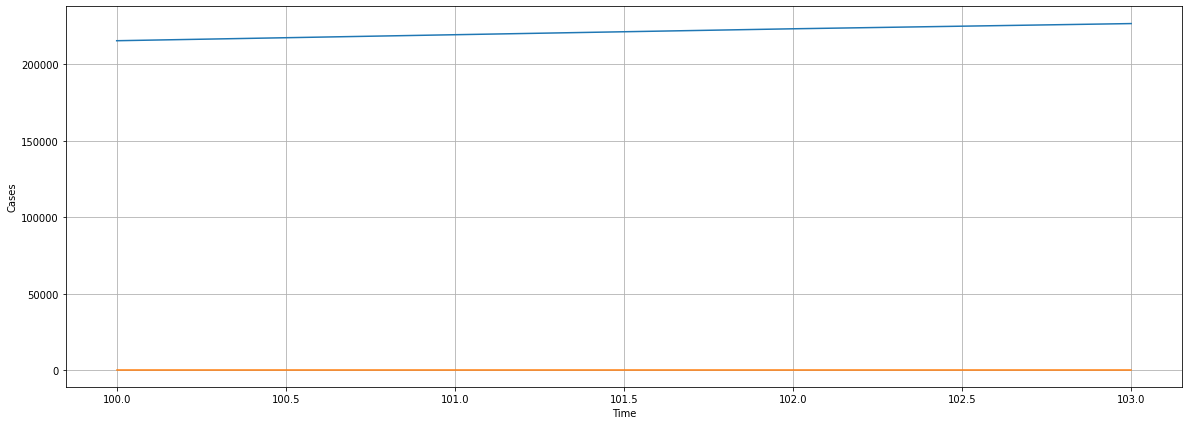

In [35]:

forecast = []
for time in range(len(series)- window_size):
  forecast.append(model.predict(series[time: time+window_size][np.newaxis]))

forecast = forecast[split_window-window_size:]
result = np.array(forecast)[:,0,0]

plt.figure(figsize=(20, 7))
plot_series(time_valid, x_valid)
plot_series(time_valid,result)

In [36]:
tf.keras.metrics.mean_absolute_error(x_valid, result).numpy()

220533.19

***Our model is a bit better compared to the latter one, though the simple DNN model was better compared to it***

**Note: let us now use a Long Short Term Memory Model**

In [0]:
tf.keras.backend.clear_session()

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

tf.keras.models.Sequential([
                            tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                                                   input_shape=[None]),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                            tf.keras.layers.Dense(1),
                            tf.keras.layers.Lambda(lambda x: x*100.0)])

optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)

model.compile(loss = 'mae', optimizer=optimizer)

history = model.fit(dataset, epochs=300, verbose =0)
print("Done Traning")


Done Traning


***Predict using the Model***

No handles with labels found to put in legend.


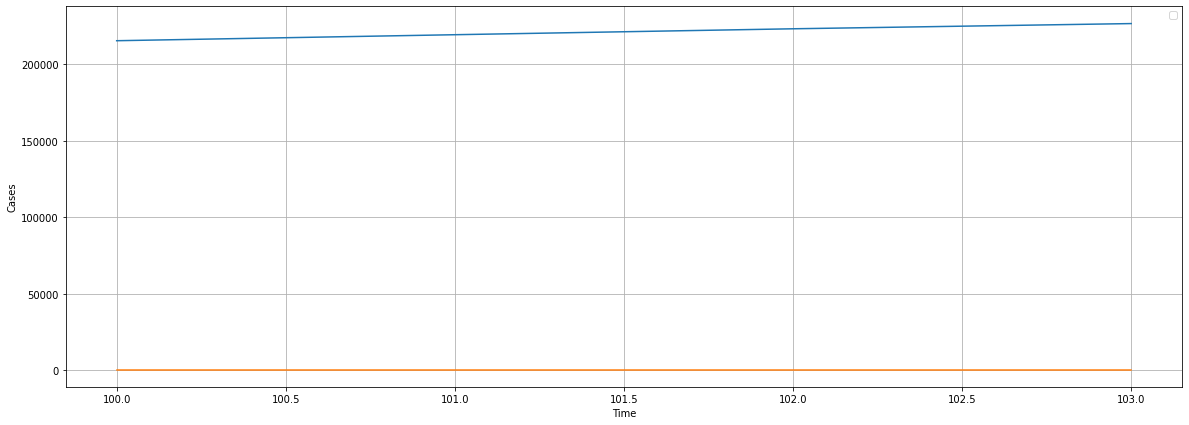

In [0]:
# forecast and plot using the model
forecast = []
for time in range(len(series)- window_size):
  forecast.append(model.predict(series[time: time+window_size][np.newaxis]))

forecast = forecast[split_window-window_size:]
result = np.array(forecast)[:,0,0]

plt.figure(figsize=(20, 7))

plot_series(time_valid, x_valid)
plot_series(time_valid,result)


***View your prediction Error***

In [0]:
tf.keras.metrics.mean_absolute_error(x_valid, result).numpy()

5719.914

***Our present model is doing better compared to the ones we have created earlier, so we can get to check the training loss and then update our parameters***

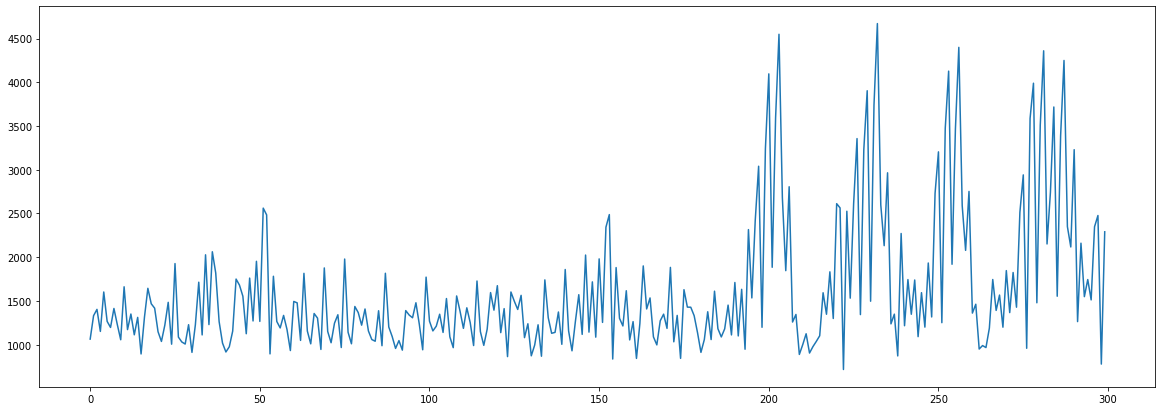

In [0]:
loss = history.history["loss"]
epochs = range(len(loss))
plt.figure(figsize=(20,7))
plt.plot(epochs, loss)

***From the plot above, we can observe that the loss isn't decreasing per epoch but fluctuating. This can be due to parameters such as the learning rate, the batch_size, window_size and at times the shuffle_buffer_size. So we would update this parameters in the next model.***

Done Traning


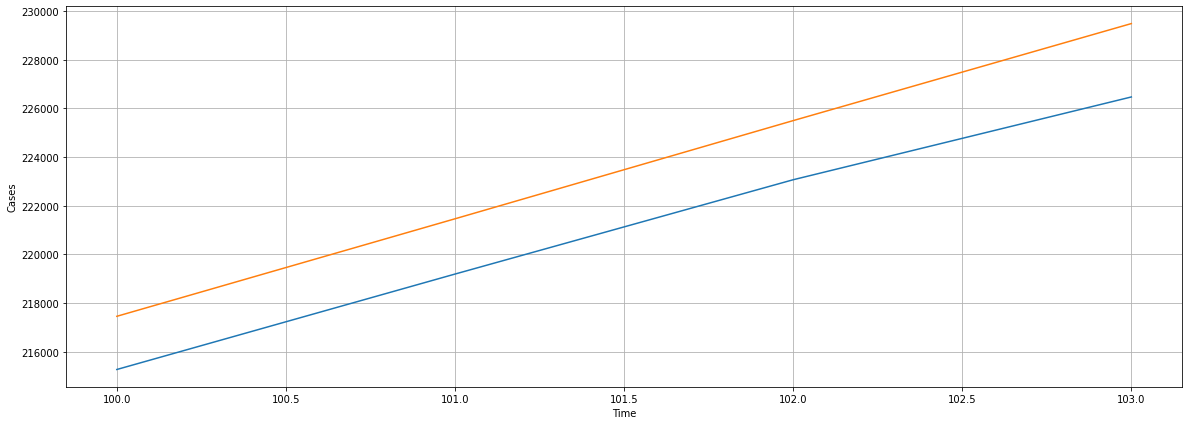

In [0]:
# Updating the parameters
window_size = 1
batch_size = 64
shuffle_buffer_size = 40

tf.keras.backend.clear_session()

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

tf.keras.models.Sequential([
                            tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                                                   input_shape=[None]),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                            tf.keras.layers.Dense(1),
                            tf.keras.layers.Lambda(lambda x: x*100.0)])

optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)

model.compile(loss = 'mae', optimizer=optimizer)

history = model.fit(dataset, epochs=300, verbose =0)
print("Done Traning")

# forecast and plot using the model
forecast = []
for time in range(len(series)- window_size):
  forecast.append(model.predict(series[time: time+window_size][np.newaxis]))

forecast = forecast[split_window-window_size:]
result = np.array(forecast)[:,0,0]

plt.figure(figsize=(20, 7))
plot_series(time_valid, x_valid)
plot_series(time_valid,result)

***View your prediction Error***

In [0]:
tf.keras.metrics.mean_absolute_error(x_valid, result).numpy()

2476.1836

***The model is doing good, so let us check again if our training loss is decreasing or fluctuating.***

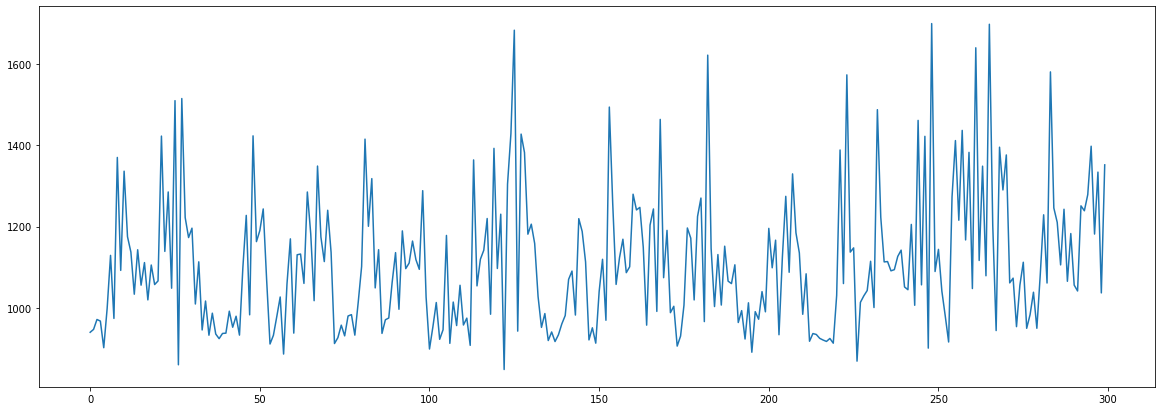

In [0]:
loss = history.history["loss"]
epochs = range(len(loss))
plt.figure(figsize=(20,7))
plt.plot(epochs, loss)

***From the plot above, our loss is still fluctuating, but it is better compared to the one, we plotted earlier, so our model parameters can still be optimized the more to give a better prediction.***
 
 Let's add an extra LSTM layer of 32 neurons and see its impact on the model

Done Traning


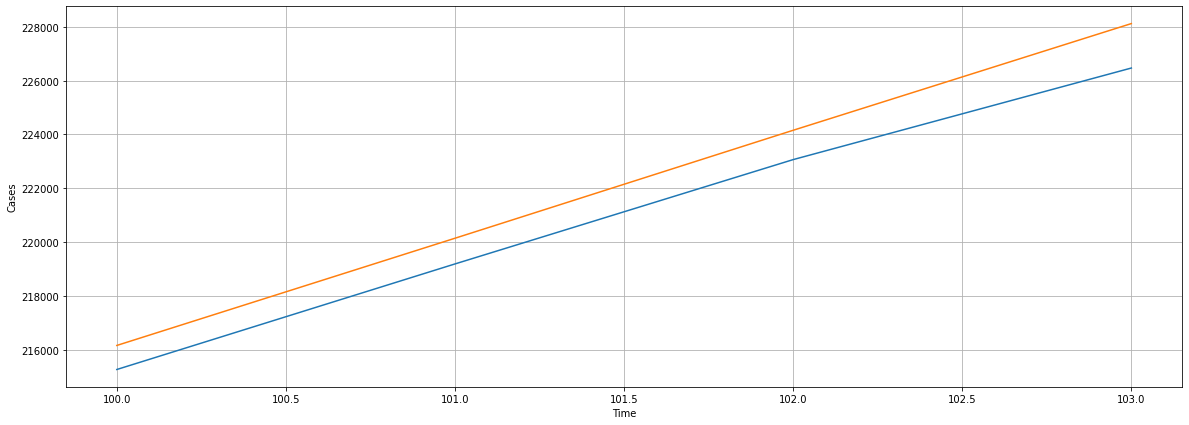

In [0]:
# Updating the parameters
window_size = 1
batch_size = 64
shuffle_buffer_size = 30

tf.keras.backend.clear_session()

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

tf.keras.models.Sequential([
                            tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                                                   input_shape=[None]),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                            tf.keras.layers.Dense(1),
                            tf.keras.layers.Lambda(lambda x: x*100.0)])

optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)

model.compile(loss = 'mae', optimizer=optimizer)

history = model.fit(dataset, epochs=300, verbose =0)
print("Done Traning")

# forecast and plot using the model
forecast = []
for time in range(len(series)- window_size):
  forecast.append(model.predict(series[time: time+window_size][np.newaxis]))

forecast = forecast[split_window-window_size:]
result = np.array(forecast)[:,0,0]

plt.figure(figsize=(20, 7))
plot_series(time_valid, x_valid)
plot_series(time_valid,result)

***View your prediction Error***

In [0]:
tf.keras.metrics.mean_absolute_error(x_valid, result).numpy()

1147.5586

***Our model is really doing good, as we have seen a drop in error and also a good prediction, it seems adding an extra layer of LSTM did the magic.***
 
 Let's add another extra LSTM layer of 32 neurons and see its impact on the model

Done Traning


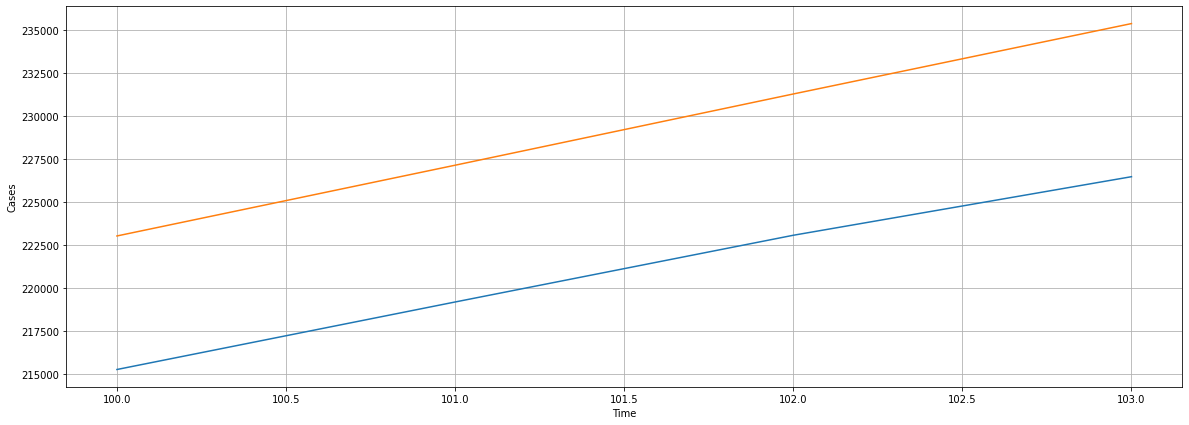

In [0]:
# Updating the parameters
window_size = 1
batch_size = 64
shuffle_buffer_size = 30

tf.keras.backend.clear_session()

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

tf.keras.models.Sequential([
                            tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                                                   input_shape=[None]),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                            tf.keras.layers.Dense(1),
                            tf.keras.layers.Lambda(lambda x: x*100.0)])

optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)

model.compile(loss = 'mae', optimizer=optimizer)

history = model.fit(dataset, epochs=300, verbose =0)
print("Done Traning")

# forecast and plot using the model
forecast = []
for time in range(len(series)- window_size):
  forecast.append(model.predict(series[time: time+window_size][np.newaxis]))

forecast = forecast[split_window-window_size:]
result = np.array(forecast)[:,0,0]

plt.figure(figsize=(20, 7))
plot_series(time_valid, x_valid)
plot_series(time_valid,result)

***The impact of the new added extra layer of LSTM is not seen on the prediction.***

Let's create a Convolutional model and use it in predicting

Note: For this model I have updated the lambda layer. 

Done Traning


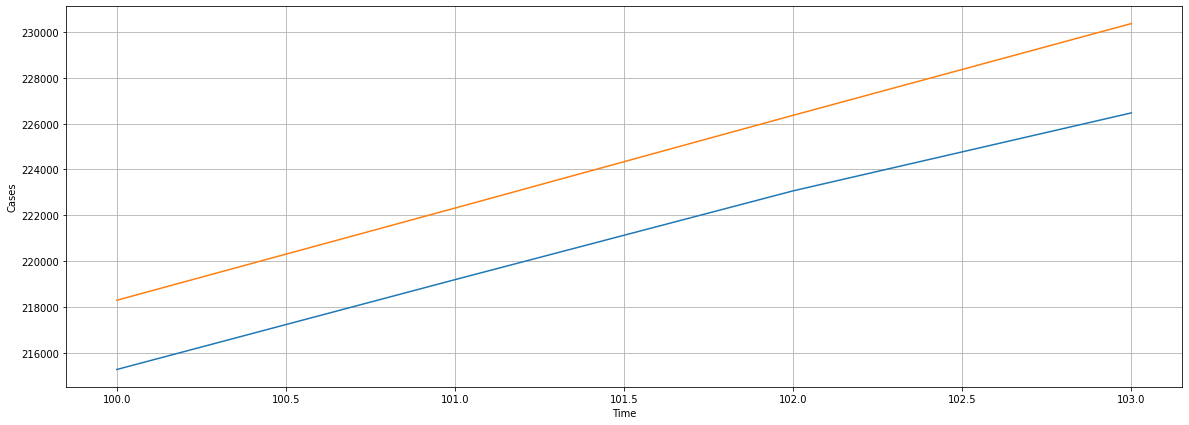

In [0]:
tf.keras.backend.clear_session()

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

tf.keras.models.Sequential([
                            tf.keras.layers.Conv1D(filters=60, kernel_size=5, strides=1, padding="causal", activation= "relu", 
                                                   input_shape=[None, 1]),
                            tf.keras.layers.Dense(1),
                            tf.keras.layers.Lambda(lambda x: x*200.0)])

optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)

model.compile(loss = 'mae', optimizer=optimizer)

history = model.fit(dataset, epochs=300, verbose =0)
print("Done Traning")

# forecast and plot using the model
forecast = []
for time in range(len(series)- window_size):
  forecast.append(model.predict(series[time: time+window_size][np.newaxis]))

forecast = forecast[split_window-window_size:]
result = np.array(forecast)[:,0,0]

plt.figure(figsize=(20, 7))
plot_series(time_valid, x_valid)
plot_series(time_valid,result)

In [0]:
tf.keras.metrics.mean_absolute_error(x_valid, result).numpy()

3336.379

***The prediction of the Model using one convolutional layer wasn't that poor.***

Now lets create a model that uses both LSTMs, CNNs, and a Dense layer

Done Traning


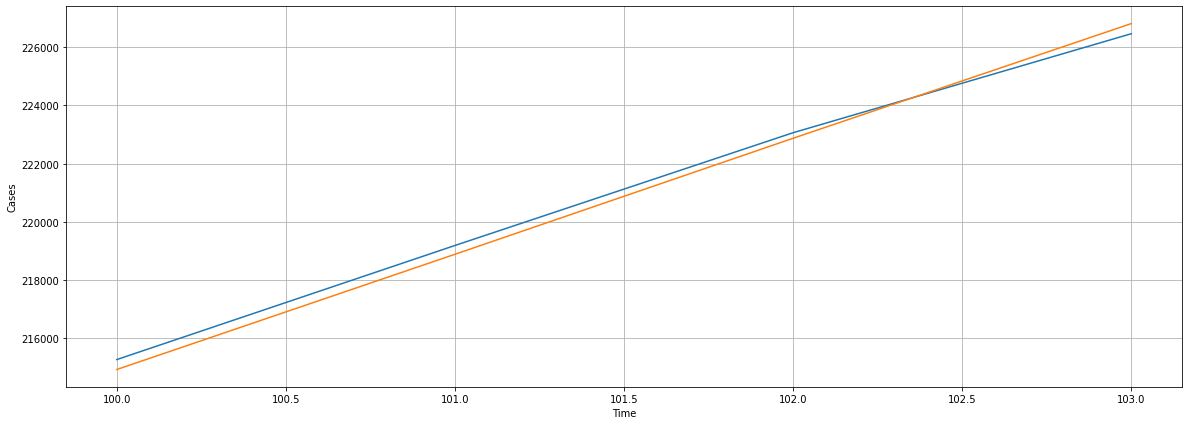

In [0]:
tf.keras.backend.clear_session()

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

tf.keras.models.Sequential([
                            tf.keras.layers.Conv1D(filters=60, kernel_size=5, strides=1, padding="causal", activation= "relu", 
                                                   input_shape=[None, 1]),
                            tf.keras.layers.Conv1D(filters=60, kernel_size=5, strides=1, padding="causal", activation="relu"),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(60, return_sequences=True)),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(60, return_sequences=True)),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                            tf.keras.layers.Dense(30, activation="relu"),
                            tf.keras.layers.Dense(30, activation = "relu"),
                            tf.keras.layers.Dense(1),
                            tf.keras.layers.Lambda(lambda x: x*400.0)])

optimizer = tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9)

model.compile(loss = 'mae', optimizer=optimizer)

history = model.fit(dataset, epochs=300, verbose =0)
print("Done Traning")

# forecast and plot using the model
forecast = []
for time in range(len(series)- window_size):
  forecast.append(model.predict(series[time: time+window_size][np.newaxis]))

forecast = forecast[split_window-window_size:]
result = np.array(forecast)[:,0,0]

plt.figure(figsize=(20, 7))
plot_series(time_valid, x_valid)
plot_series(time_valid,result)

In [0]:
tf.keras.metrics.mean_absolute_error(x_valid, result).numpy()

295.86328

#NOTE: You can also improve the Model.